WRANGLE AND ANALYZE DATA:
    
INTRODUCTION:
        
        The dataset that I will be wrangling (and analyzing and visualizing) is WeRateDogs, tweet archive of Tweeter account using python (and it's libraries).
        
        And will document wrangling efforts in Jupyter Notebook.
        
        The WeRateDogs is a Tweeter account, that rates people's dogs with a humorous comment about the dog.
        
        These ratings almost have a denominator of 10.
         
        The numerators always greater than 10. Like 11/10, 15/10, etc...
        
        Because "they are good dogs Brent."  
        
        WeRateDogs has over 4 million followers and recived international media coverage.
        
        WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us to use in this project.
        
        This archive contains basic tweet data (tweet ID, timestamp, text, source, expanded_urls, name, etc...) for all 5000+ of their tweet as they stood on Auguest 1, 2017.   
        
        The main goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analysis and visualizations.
        
        Need to do addtional gathering, then assesing and cleaning for worthy analysis and visualizations.

THE DATA :

ENHANCED TWITTER ARCHIVE:
    
    The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.
    
    One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." 
    
    We manually downloaded this file manually by clicking the following link: twitter_archive_enhanced.csv

Additional Data via the Twitter API:
    

    1. Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. 
    2. Fortunately, this additional data can be gathered by anyone from Twitter's API.
    3. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. Because we have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+.
    4. And we are going to query Twitter's API to gather this valuable data.

IMAGE PREDICTIONS FILE:
    
    The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.
    
    This file (image_predictions.tsv) hosted on Udacity's servers and we downloaded it programmatically using python Requests library on the following (URL)
    
    url = https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

Key Points :
    
Key points to keep in mind when data wrangling for this project:

1. We only want original ratings (no retweets) that have images. 
2. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
3. Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate our skills in data wrangling. 
4. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
5. Cleaning includes merging individual pieces of data according to the rules of tidy data.
6. The fact that the rating numerators are greater than the denominators does not need to be cleaned. 
7. his unique rating system is a big part of the popularity of WeRateDogs.
8. Do not need to gather the tweets beyond August 1st, 2017.

Twitter API:
    
    In this project, we will be using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. 
    
    This additional data will include retweet count and favorite count.

    Some APIs are completely open, like MediaWiki (accessed via the wptools library). Others require authentication. 
    
    The Twitter API is one that requires users to be authorized to use it. This means that before we can run our API querying code, you need to set up our own Twitter application. 

PROJECT DETAILS:
    
our tasks in this project are as follows:

Data wrangling, which consists of:

Gathering data 

Assessing data

Cleaning data

Storing, analyzing, and visualizing our wrangled data

Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

RESOURCES:
    
1. Twitter API

2. Files downloaded from Udacity

IMPORTING LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
from functools import reduce
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

GATHERING DATA :

Loading 'twitter-archive-enhanced.csv' into dataframe.

In [5]:
# Loading csv data into dataframe.

data = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

Loading 'image-predictions.tsv' from Udacity server.

In [6]:
# Loading tsv data into dataframe.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open ('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    

image_data = pd.read_csv('image-predictions.tsv', sep = '\t')

Loading 'retweet_count', 'favorite_count' from Tweeter

In [7]:
# Loading tweeter data into dataframe.

consumer_key ='xxxxx'
consumer_secret ='xxxxx'
access_token ='xxxxx'
access_secret = 'xxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser())

In [8]:
# Loading tweeter data into dataframe.

ids = list(data['tweet_id'])

tweet_lists = []
success = []
errors = []
for ele in ids:
    try:
        datas = api.get_status(ele, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_lists.append(datas)
        success.append(ele)
    except:
        errors.append(ele)
        print(ele)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

In [9]:
data_list = []

with open ('tweet-json copy') as file:
    for ele in file:
        data_list.append(json.loads(ele))
        
tweet_data = pd.DataFrame(data_list, columns = ['id', 'retweet_count', 'favorite_count'])

tweet_data = tweet_data.rename(columns = {'id': 'tweet_id'})

ASSESSING DATA :

 Assessing enhanced twitter archive data:

In [11]:
# Visual inspection of twitter archive data:

data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# Checking first 5 rows in the data.

data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
# Checking last 5 rows in the data.

data.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
# Checking random rows from the data.

data.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1153,725729321944506368,NaN,NaN,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,None,None,None,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
521,809920764300447744,NaN,NaN,2016-12-17 00:38:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Please only send in dogs. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/809920764...,10,10,None,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None


Column 'source' is in html and tag ' <a '.

In [15]:
# Checking data's detail informations:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

1. Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'.
2. Columns 'timestamp' is in object(string).

In [16]:
# Checking data's detail informations:

data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# Checking data's detail informations:

data.describe(include = 'object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,2016-10-26 22:31:36 +0000,https://twitter.com/dog_rates/status/667138269...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [18]:
data['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

'retweeted_status_user_id' has duplicated values.

In [19]:
data['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
data['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
data['in_reply_to_user_id'].value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [22]:
data['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [23]:
data['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Deacon       1
Jordy        1
Bruiser      1
Swagger      1
Mark         1
Name: name, Length: 957, dtype: int64

In [24]:
# Checking the names, which contain lower cases.

data[data['name'].str.islower()].name.count()

109

column 'name' has 109 lower cases names/words.

In [25]:
# Checking the names, which contain upper cases.

data[data['name'].str.isupper()].name

775      O
2041    JD
Name: name, dtype: object

In [26]:
# Checking number of rating_denominator rows, which is greater than 10.

data.query("rating_denominator > 10").shape[0]

20

In [27]:
# Checking number of rating_numerator rows, which is greater than 10.

data.query("rating_numerator > 10").shape[0]

1455

In [28]:
data['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [29]:
data['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [30]:
data['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [31]:
data['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [32]:
data.duplicated('tweet_id').sum()

0

In [33]:
data.duplicated('source').sum()

2352

In [34]:
data.duplicated('expanded_urls').sum()

137

Assessing image prediction data:

In [36]:
# Visual inspection of image prediction data:

image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [37]:
# Checking first 5 rows in the data.

image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
# Checking last 5 rows in the data.

image_data.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [39]:
# Checking data's detail informations:

image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [40]:
# Checking data's detail informations:

image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [41]:
# Checking data's detail informations:

image_data.describe(include = ['object','bool'])

,jpg_url,p1,p1_dog,p2,p2_dog,p3,p3_dog
count,2075,2075,2075,2075,2075,2075,2075
unique,2009,378,2,405,2,408,2
top,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,golden_retriever,True,Labrador_retriever,True,Labrador_retriever,True
freq,2,150,1532,104,1553,79,1499


In [42]:
# Checking random rows from the data.

image_data.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True


In [43]:
image_data['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
standard_schnauzer      1
school_bus              1
pole                    1
prayer_rug              1
park_bench              1
Name: p1, Length: 378, dtype: int64

In [44]:
image_data['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
dining_table            1
projectile              1
cougar                  1
siamang                 1
laptop                  1
Name: p2, Length: 405, dtype: int64

In [45]:
image_data['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
pool_table             1
pretzel                1
African_chameleon      1
jeep                   1
partridge              1
Name: p3, Length: 408, dtype: int64

In [46]:
image_data['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [47]:
image_data['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [48]:
image_data['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [49]:
# Checking duplicate rows:

image_data.jpg_url.duplicated().sum()

66

 Column 'jpg_url' has dulipacted values.

Assessing Tweeter data:

In [50]:
# Visual inspection of twitter data:

tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [51]:
# Checking first 5 rows in the data.

tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [52]:
# Checking last 5 rows in the data.

tweet_data.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [53]:
# Checking random rows from the data.

tweet_data.sample(7)

,tweet_id,retweet_count,favorite_count
1128,729113531270991872,370,2054
1375,701601587219795968,523,2299
468,816829038950027264,5496,0
168,859196978902773760,25661,75193
1803,676942428000112642,855,2261
1405,699079609774645248,745,2677
564,802265048156610565,1573,7039


In [54]:
# Checking data's detail informations:

tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [55]:
# Checking data's detail informations:

tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [56]:
tweet_data['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [57]:
tweet_data['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [58]:
# Checking duplicate rows:

tweet_data.tweet_id.duplicated().sum()

0

In [59]:
# Checking null values in the dataset:

tweet_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

QUALITY ISSUES :

data:

1. [Visual Inspection]: Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.
2. [Visual Inspection]: The columns 'doggo', 'floofer', 'pupper', 'puppo' have (string) 'None' instead of NaN.
3. [Visual Inspection]: Column 'source' is in html format and  contains extra tag ' <a '.
4. Programming: Columns 'timestamp' is in object(string).
5. Programming: Column 'name' has inaccurate names like a, an, the, this, not, and some lower case words.
6. Programming: Columns 'rating_numerator', 'rating_denominator' have values more than 10. 
7. Programming: Column 'retweeted_status_user_id' has duplicated values.
8. Programming: Column 'name' has inaccurate names like O instead of O'Malley (gotto know from 'text').

image_data:

9. [Visual Inspection]: 'data' dataframe has 2356 tweets and 'image_data' dataframe has 2075 tweets.
10. Programming: Column 'jpg_url' has dulipacted values.

tweet_data:

11. [Visual Inspection]: Missing tweets.

TIDINESS ISSUES :
 
data:
    
1. The columns 'doggo', 'floofer', 'pupper', 'puppo' should be one column.

image_data:
    
2. 'image_data' dataframe should be combined to 'data' dataframe.
3. Creating two columns 'image_pred'(prediction for the image in the tweet) and 'pred_value' (confidence level of predicted image), and droping 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'. 

tweet_data:
    
4. 'tweet_data' dataframe should be combined to 'data' dataframe.

CLEANING DATA :

In [359]:
# Copying original data set:

df = data.copy()
image_df = image_data.copy()
tweet_df = tweet_data.copy()

Tidiness issue 1 :

DEFINE:

    issue: The columns 'doggo', 'floofer', 'pupper', 'puppo' should be one column.
    
    solution: create 2 columns 'dogs' and 'stages' using melt function and drop unused column.

CODE:

In [360]:
# combining all four columns into two using pd.melt:

data_list = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

df = pd.melt(df, id_vars = data_list , var_name = 'dogs', value_name = 'dog_stages')

In [361]:
# Droping 'dogs' column:

df = df.drop('dogs', axis = 1)

In [362]:
# Droping duplicated values:

df = df.sort_values('dog_stages').drop_duplicates(subset = 'tweet_id', keep = 'last')

TEST:

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   expanded_urls               2297 non-null   object 
 5   rating_numerator            2356 non-null   int64  
 6   rating_denominator          2356 non-null   int64  
 7   name                        2356 non-null   object 
 8   in_reply_to_status_id       78 non-null     float64
 9   in_reply_to_user_id         78 non-null     float64
 10  retweeted_status_id         181 non-null    float64
 11  retweeted_status_user_id    181 non-null    float64
 12  retweeted_status_timestamp  181 non-null    object 
 13  dog_stages                  23

Tidiness issue 2 :

DEFINE:

issue: Creating two columns 'dog_bread' (prediction for the image in the tweet) and 'pred_value' (confidence level of predicted image), and droping 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'.
    
solution: Create a function, where it can keep the first predicted image and its confidence level values.

CODE:

In [364]:
# creating function with nested if statement to create 2 columns:

dog_bread = []
pred_value = []

def dogs(image_df):
    
    if image_df['p1_dog'] == True:
        dog_bread.append(image_df['p1'])
        pred_value.append(image_df['p1_conf'])
    elif image_df['p2_dog'] == True:
        dog_bread.append(image_df['p2'])
        pred_value.append(image_df['p2_conf'])
    elif image_df['p3_dog'] == True:
        dog_bread.append(image_df['p3'])
        pred_value.append(image_df['p3_conf'])
    else:
        dog_bread.append('NO')
        pred_value.append('NO')

In [365]:
# Pandas series objects applying in the data:

image_df.apply(dogs, axis = 1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [366]:
# Create two columns:

image_df['dog_bread'] = dog_bread
image_df['pred_value'] = pred_value

In [367]:
# Droping no longer needed coulms:

image_df = image_df.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1)

In [368]:
# Delecting no longer needed rows:

image_df = image_df[image_df['dog_bread'] != 'NO']

TEST:

In [369]:
image_df.sample(3)

,tweet_id,jpg_url,img_num,dog_bread,pred_value
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,Eskimo_dog,0.615741
530,676819651066732545,https://pbs.twimg.com/media/CWSL4W8WsAAE4KU.jpg,2,Labrador_retriever,0.0394646
526,676613908052996102,https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg,1,Doberman,0.0964228


In [370]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1751 non-null   int64 
 1   jpg_url     1751 non-null   object
 2   img_num     1751 non-null   int64 
 3   dog_bread   1751 non-null   object
 4   pred_value  1751 non-null   object
dtypes: int64(2), object(3)
memory usage: 82.1+ KB


Tidiness issue 3 :

DEFINE:

issue: 'image_data' dataframe should be combined to 'data' dataframe.

solution: Merging two data sets in one.

CODE :

In [371]:
# Merging image_df dataset to df dataset using merge function :

df = pd.merge(image_df, df, how = 'left', on = ['tweet_id'])

TEST :

In [372]:
df.head(2)

,tweet_id,jpg_url,img_num,dog_bread,pred_value,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,dog_stages
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,NaN,NaN,NaN,NaN,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,NaN,None


In [373]:
df.shape

(1751, 18)

Tidiness issue 4 :

DEFINE:

issue: 'tweet_data' dataframe should be combined to 'data' dataframe.

solution: Merging two data sets in one.

CODE :

In [374]:
# Merging tweet_df dataset to df dataset using merge function:

df = pd.merge(df, tweet_df, how = 'left', on = ['tweet_id'])

TEST :

In [375]:
df.shape

(1751, 20)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1751 non-null   int64  
 1   jpg_url                     1751 non-null   object 
 2   img_num                     1751 non-null   int64  
 3   dog_bread                   1751 non-null   object 
 4   pred_value                  1751 non-null   object 
 5   timestamp                   1751 non-null   object 
 6   source                      1751 non-null   object 
 7   text                        1751 non-null   object 
 8   expanded_urls               1751 non-null   object 
 9   rating_numerator            1751 non-null   int64  
 10  rating_denominator          1751 non-null   int64  
 11  name                        1751 non-null   object 
 12  in_reply_to_status_id       20 non-null     float64
 13  in_reply_to_user_id         20 no

QUALITY ISSUES 1 :

DEFINE:

issue: Column 'retweeted_status_user_id' has duplicated values.

solution: Drop dulicated rows.

CODE :

In [377]:
# Dropping duplicated rows in 'retweeted_status_user_id' :

df = df[pd.isnull(df['retweeted_status_user_id'])]

TEST :

In [378]:
df.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

QUALITY ISSUES 2 :

DEFINE :

issue: Missing values in 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'.

solution: Drop no longer related columns.

CODE :

In [379]:
# Dropping unused columns in the data set.

df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

TEST :

In [380]:
df.tail(3)

,tweet_id,jpg_url,img_num,dog_bread,pred_value,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
1748,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,8964.0,42908.0
1749,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328.0,25461.0
1750,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514.0,33819.0


QUALITY ISSUES 3 :

DEFINE : 

issue: Column 'name' has inaccurate names like a, an, the, this, not, and some lower case words.

solution: Separate lower case words, and delete it.

CODE :

In [381]:
# Function to collect all lower case words:

dog_name = []

for ele in df['name']:
    if ele.islower() and ele not in dog_name:
        dog_name.append(ele)
        
dog_name

['a',
 'the',
 'an',
 'space',
 'just',
 'light',
 'one',
 'officially',
 'actually',
 'getting',
 'very',
 'infuriating',
 'all',
 'unacceptable',
 'not',
 'my',
 'incredibly',
 'quite']

In [382]:
# Replacing lowercase and None values with null values and dropping it:

df['name'] = df['name'].replace(dog_name, np.nan)
df['name'] = df['name'].replace('None', np.nan)

df['name'] = df['name'].dropna()

TEST :

In [383]:
df['name'].value_counts()

Lucy       10
Cooper     10
Charlie    10
Oliver      9
Tucker      9
           ..
Jangle      1
Dutch       1
Roscoe      1
Margo       1
Iroh        1
Name: name, Length: 833, dtype: int64

QUALITY ISSUES 4 :

DEFINE : 

issue: Column 'jpg_url' has dulipacted values.

solution: Delete dulicated rows.

CODE :

In [384]:
# Dropping dulicated rows in 'jpg_url'.

df = df.drop_duplicates(subset = 'jpg_url', keep = 'last', ignore_index=True)

TEST :

In [385]:
df.duplicated('jpg_url').sum()

0

QUALITY ISSUES 5 :

DEFINE :

issue: Column 'source' is in html format and has tag ' <a '.
    
solution: Remove unwanted tags using str.split

CODE :

In [386]:
# Removing unnwanted tags in 'source' column, using split function.

herf = df['source'].str.split('"', expand = True)

df['source'] = herf[1]

TEST :

In [387]:
df['source'][:5]

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

In [388]:
df.head(2)

,tweet_id,jpg_url,img_num,dog_bread,pred_value,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,2015-11-15 22:32:08 +0000,http://twitter.com/download/iphone,Here we have a Japanese Irish Setter. Lost eye...,8,10,NaN,None,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,2015-11-15 23:05:30 +0000,http://twitter.com/download/iphone,This is a western brown Mitsubishi terrier. Up...,7,10,NaN,None,48.0,132.0


QUALITY ISSUES 6 :

DEFINE :

issue: Columns 'timestamp' is in object(string).

solution: Convert string format to datetime format.

CODE :

In [389]:
# Coverting string to datetime format.

df['timestamp'] = pd.to_datetime(df['timestamp'])

TEST :

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   jpg_url             1686 non-null   object             
 2   img_num             1686 non-null   int64              
 3   dog_bread           1686 non-null   object             
 4   pred_value          1686 non-null   object             
 5   timestamp           1686 non-null   datetime64[ns, UTC]
 6   source              1686 non-null   object             
 7   text                1686 non-null   object             
 8   rating_numerator    1686 non-null   int64              
 9   rating_denominator  1686 non-null   int64              
 10  name                1187 non-null   object             
 11  dog_stages          1686 non-null   object             
 12  retweet_count       1686 non-null 

QUALITY ISSUES 7 :

DEFINE :

issue: Columns 'rating_numerator', 'rating_denominator' have values more than 10. 
    
solution: Create a column 'dog_rating' using 'rating_numerator' / 'rating_denominator'. Inorder to check the dog ratings for future analysis.

CODE :

In [391]:
# Creating rating column by diving numerator and denominator rating column.

df['dog_rating'] = df['rating_numerator'] / df['rating_denominator']

TEST :

In [392]:
df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_bread', 'pred_value',
       'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stages', 'retweet_count', 'favorite_count', 'dog_rating'],
      dtype='object')

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   jpg_url             1686 non-null   object             
 2   img_num             1686 non-null   int64              
 3   dog_bread           1686 non-null   object             
 4   pred_value          1686 non-null   object             
 5   timestamp           1686 non-null   datetime64[ns, UTC]
 6   source              1686 non-null   object             
 7   text                1686 non-null   object             
 8   rating_numerator    1686 non-null   int64              
 9   rating_denominator  1686 non-null   int64              
 10  name                1187 non-null   object             
 11  dog_stages          1686 non-null   object             
 12  retweet_count       1686 non-null 

QUALITY ISSUES 8 :

DEFINE :

issue: Column 'name' has inaccurate names like O instead of O'Malley (gotto know from 'text').
    
solution: Replace with original name.

CODE :

In [394]:
# replacing O with O'Malley.

df['name'].replace('O', "O'Malley", inplace = True)

TEST :

In [395]:
df[df['name'] == "O'Malley"]

,tweet_id,jpg_url,img_num,dog_bread,pred_value,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,dog_rating
1178,776201521193218049,https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg,1,Rottweiler,0.502228,2016-09-14 23:30:38+00:00,http://twitter.com/download/iphone,This is O'Malley. That is how he sleeps. Doesn...,10,10,O'Malley,None,2919.0,10681.0,1.0


QUALITY ISSUES 9 :

DEFINE :

issue: The columns 'doggo', 'floofer', 'pupper', 'puppo' have (string) 'None' instead of NaN.

solution: Replace with NaN.

In [396]:
# Replacing None with null value.

df['dog_stages'] = df['dog_stages'].replace('None', np.nan)

In [397]:
df.dog_stages.value_counts()

pupper     176
doggo       54
puppo       22
floofer      8
Name: dog_stages, dtype: int64

QUALITY ISSUES 10 :

DEFINE :

issue: The columns 'retweet_count' and 'favorite_count' have (float) instead of int.

solution: Convert to int datatype.

CODE :

In [398]:
# Convert to int datatype:

df['retweet_count'] = df['retweet_count'].astype(int)
df['favorite_count'] = df['favorite_count'].astype(int)

TEST :

In [399]:
df.sample(3)

,tweet_id,jpg_url,img_num,dog_bread,pred_value,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,dog_rating
1572,862096992088072192,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,2,chow,0.677589,2017-05-10 00:08:34+00:00,http://twitter.com/download/iphone,We only rate dogs. Please don't send perfectly...,13,10,NaN,NaN,21840,66437,1.3
51,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,2015-11-19 01:59:39+00:00,http://twitter.com/download/iphone,This is Bradlay. He is a Ronaldinho Matsuyama ...,11,10,Bradlay,NaN,66,268,1.1
1288,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,2016-11-12 00:36:46+00:00,http://twitter.com/download/iphone,This is Pancake. She loves Batman and winks li...,12,10,Pancake,NaN,7726,22328,1.2


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   int64              
 1   jpg_url             1686 non-null   object             
 2   img_num             1686 non-null   int64              
 3   dog_bread           1686 non-null   object             
 4   pred_value          1686 non-null   object             
 5   timestamp           1686 non-null   datetime64[ns, UTC]
 6   source              1686 non-null   object             
 7   text                1686 non-null   object             
 8   rating_numerator    1686 non-null   int64              
 9   rating_denominator  1686 non-null   int64              
 10  name                1187 non-null   object             
 11  dog_stages          260 non-null    object             
 12  retweet_count       1686 non-null 

STORING DATA :

In [496]:
# Storing data in CSV file.

df.to_csv('twitter_archive_master.csv', index = False)

ANALYZING AND VISUALIZING DATAFRAME :

NOTE :
    Analyses and Visualizations are based on my wrangling work that I assessed and cleaned according to my knowlegde.

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'img_num'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>],
       [<AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'favorite_count'}>],
       [<AxesSubplot:title={'center':'dog_rating'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

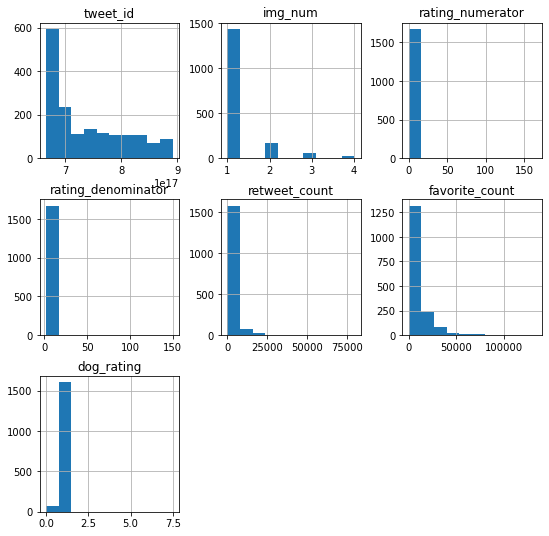

In [499]:
# Plot histagram to data:

df.hist(figsize=(9,9))

Comparison of average rating of dog_stages:

In [498]:
# Comparison of average rating of dog_stages:

# Creating new dataframe for dog_stages:
dog_stage = df['dog_stages'].value_counts()
dog_stage = pd.DataFrame(dog_stage)

# Total count of the dog_stages:
total = dog_stage['dog_stages'].sum()

# Adding percentage column to dog_stage:
dog_stage['percentage'] = dog_stage['dog_stages']/total * 100
dog_stage

,dog_stages,percentage
pupper,176,67.692308
doggo,54,20.769231
puppo,22,8.461538
floofer,8,3.076923


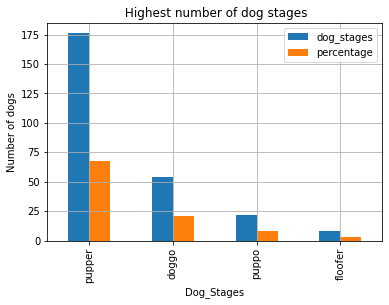

In [444]:
# Plot bar graph to check highest number of dog_stages:

dog_stage.plot(kind = 'bar')

plt.title(' Highest number of dog stages')
plt.xlabel('Dog_Stages')
plt.ylabel('Number of dogs')
plt.grid()

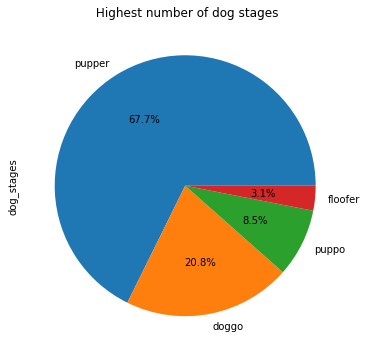

In [456]:
# Plot pie graph to check highest number of dog_stages:

dog_stage['dog_stages'].plot(kind = 'pie', autopct='%1.1f%%', figsize = (6,6))
plt.title(' Highest number of dog stages')
plt.grid()

OBSERVATIONS:
1. According to this dataframe, pupper stage has the highest avrage rating of count 176 dogs. Followed by doggo of count 54.
2. The least/lowest avreage rating is floofer of count 8.
3. From pie chart and bar chart, overall population of pupper is 67.7% followed by doggo of 20.7%, puppo of 8.5%.
4. Lowest popullation of dog bread is floofer of only 3.07%


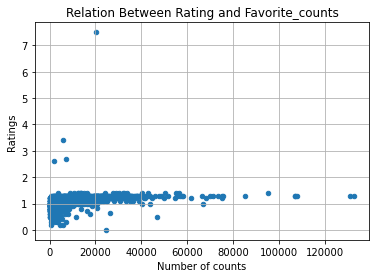

In [405]:
# Plot scatter graph to check the relation between Rating and Favorite_counts:

df.plot(kind = 'scatter', y = 'dog_rating', x = 'favorite_count')
plt.title('Relation Between Rating and Favorite_counts')
plt.xlabel('Number of counts')
plt.ylabel('Ratings')
plt.grid()

OBSERVATIONS:
1. According to graph, there is no relationship between rating and favorite_counts. 

Checking the relation between retweet_count and favorite counts:

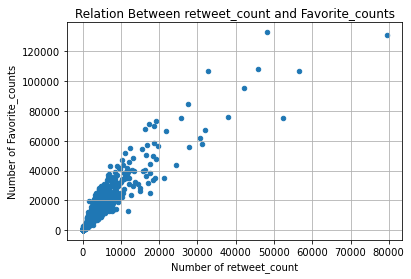

In [406]:
# Plot scatter graph to check the relation between retweet_count and favorite counts:

df.plot(kind = 'scatter', y = 'favorite_count', x = 'retweet_count')
plt.title('Relation Between retweet_count and Favorite_counts')
plt.xlabel('Number of retweet_count')
plt.ylabel('Number of Favorite_counts')
plt.grid()

OBSERVATIONS:
1. According to graph, There is a relationship between retweet_count and Favorite_counts. As retweet_counts increasing, Favorite_counts also increases.

Top 10 frequent predicted dog breeds.

In [466]:
# Top 10 frequently predicted dog breeds count:

pred_count = df['dog_bread'].value_counts()[:10].values
pred_count

array([158, 108,  95,  91,  62,  51,  48,  42,  42,  33], dtype=int64)

In [467]:
# Top 10 frequently predicted dog breeds names:

bread_name = df['dog_bread'].value_counts()[:10].index.values
bread_name

array(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian', 'malamute'],
      dtype=object)

In [469]:
# Top 10 frequently predicted dog breeds Oiginal counts(first prediction count):

original_count = []
for ele in bread_name:
    x = df[(df['dog_bread'] == ele) & (df['pred_value'] > 0.5)]['pred_value'].count()
    original_count.append(x)
    
original_count

[116, 65, 70, 47, 43, 24, 26, 30, 29, 18]

In [500]:
# Converting to pandas dataframe:

dog_rate = {'predicted_count':pred_count, 'dog_bread_name':bread_name, 'original_predicted_count': original_count}
dog_rate = pd.DataFrame(dog_rate)

# Adding percentage column to dog_rate data:

dog_rate['percentage'] = dog_rate['original_predicted_count']/dog_rate['predicted_count']*100
dog_rate

,predicted_count,dog_bread_name,original_predicted_count,percentage
0,158,golden_retriever,116,73.417722
1,108,Labrador_retriever,65,60.185185
2,95,Pembroke,70,73.684211
3,91,Chihuahua,47,51.648352
4,62,pug,43,69.354839
5,51,toy_poodle,24,47.058824
6,48,chow,26,54.166667
7,42,Samoyed,30,71.428571
8,42,Pomeranian,29,69.047619
9,33,malamute,18,54.545455


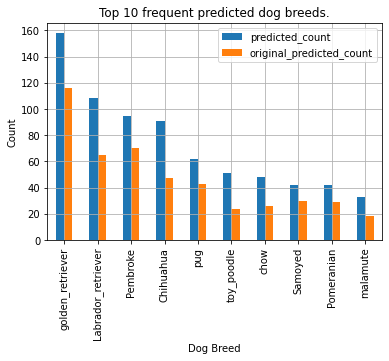

In [491]:
# Plot bar chart for top 10 frequently predicted dog breeds:

x = dog_rate[['predicted_count','original_predicted_count']].plot(kind = 'bar')
x_axis_labels = ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'chow', 'Samoyed', 'Pomeranian', 'malamute']
plt.xticks(range(10), x_axis_labels)
plt.title('Top 10 frequent predicted dog breeds.')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.grid()

OBSERVATIONS:
1. According to chart, Golden_retriever is the most frequently predicted dog breed, followed by Labrador_retriever and Pembroke.
2. From table, we can say that though malamute count is less, algorithm predicted percentage is not lowest (54.5%) but toy_poodle is the lowest (47.07%)
3. Most predictions are recored for golden_retriever.
4. Least prediction are recored for malamute.

Top 10 frequently used dog names.

In [502]:
# Plot bar chart for top 10 frequent dog names:

names = df['name'].value_counts()[:10]
names 

Lucy       10
Cooper     10
Charlie    10
Oliver      9
Tucker      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Koda        6
Name: name, dtype: int64

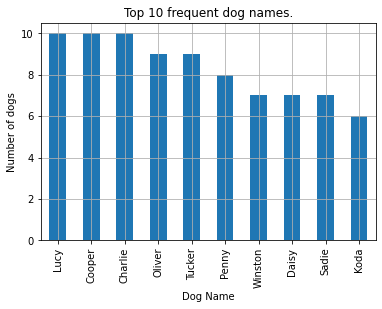

In [503]:
# Plot bar chart for top 10 frequent dog names:

names.plot(kind = 'bar')
plt.title('Top 10 frequent dog names.')
plt.xlabel('Dog Name')
plt.ylabel('Number of dogs')
plt.grid()

OBSERVATIONS:
1. According to chart, Lucy, Cooper, Charlie are the most frequently used name followed by Cooper and Charlie.
2. Koda is the lowest popular name in this dataset.
3. Highest count is 10 for Lucy, Cooper, Charlie dog names.
4. Lowest count is 6 for Koda for name.

SOLUTIONS FOR THE ANALYSIS :

NOTE :
    Analyses and Visualizations are based on my wrangling work that I assessed and cleaned according to my knowlegde.

1. 'df' data frame is created by merging all three data sets (data, image_data, tweet_data).
2. 'dog_stages' column is created using melting function and columns 'doggo', 'floofer', 'pupper', 'puppo' is delected.
3. Columns 'image_pred'(prediction for the image in the tweet) and 'pred_value' (confidence level of predicted image) are created, and dropped 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'.
4. Deleted duplicated rows in column 'retweeted_status_user_id'.
5. Dropped columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' for missing values.
6. Removed unwanted tags from column 'source'.
7. Changed column 'timestamp' format to datetime.
8. Delected lower case words and replaced None value to NaN in 'name' column.
9. Deleted duplicated rows in column 'jpg_url'.
10. Replaced O'Malley instead of 'O' in column 'name'.
11. Changed/replaced NaN instead of 'None' in column 'dog_stages' i.e., 'doggo', 'floofer', 'pupper', 'puppo'.
12. Created new column 'dog_rating' using columns 'rating_numerator', 'rating_denominator' for future analysis
13. Changed float datatype to int in column 'favorite_count' and 'retweet_count'

RESOURCES :
    
    stackoverflow
    

In [411]:
import seaborn as sns

In [412]:
model_data = df.copy()

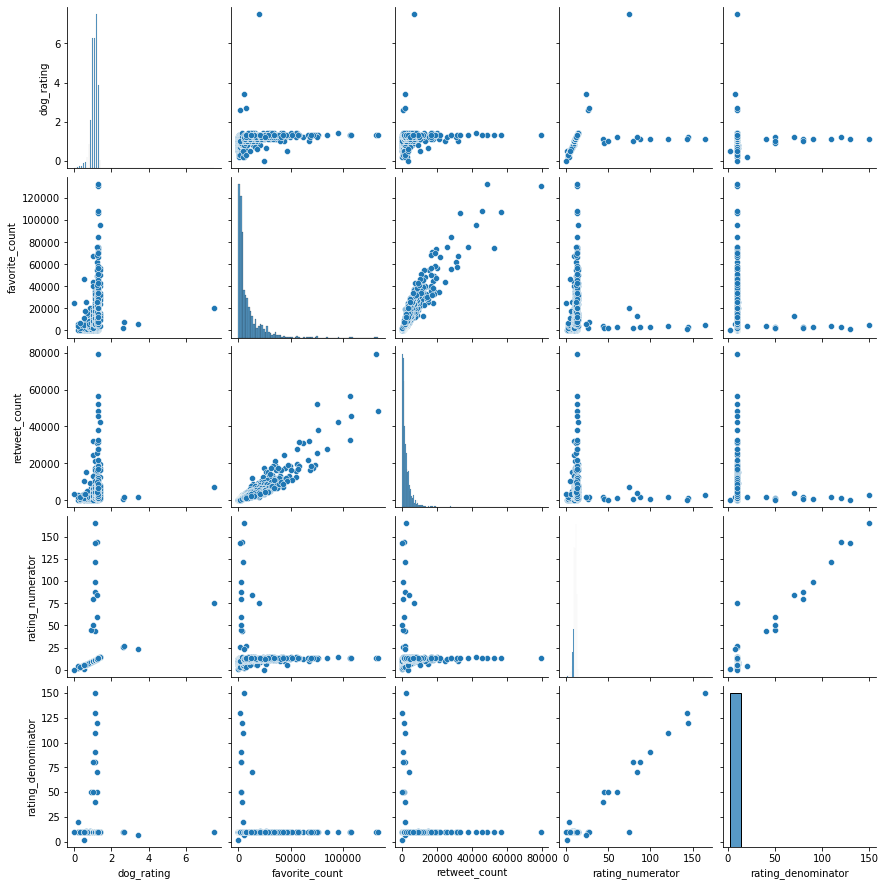

In [413]:
# To check relationship between columns.

sns.pairplot(model_data[['dog_rating', 'favorite_count', 'retweet_count', 'rating_numerator', 'rating_denominator']])

According to graph, there is a postive relationship between 'favorite_count' v/s 'retweet_count' and 'rating_numerator' v/s 'rating_denominator'